# Desafio semana 08 AceleraDev DS Codenation

### Importar bibliotecas

In [408]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from time import time
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor 
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

### Carregar arquivos

In [409]:
# Importação dos dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Exploração dos dados

In [410]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Columns: 167 entries, Unnamed: 0 to Q050
dtypes: float64(28), int64(79), object(60)
memory usage: 14.4+ MB


In [411]:
train.describe()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
count,13730.000000,13730.0,1.373000e+04,13730.000000,13730.000000,13202.000000,13730.000000,13730.000000,1.312100e+04,13121.000000,...,6354.000000,6354.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,2938.000000
mean,2288.173926,2016.0,3.088548e+06,30.736708,21.593809,0.116043,2.185652,1.048871,3.057946e+06,30.429159,...,4.530217,3.962858,4.645594,4.678441,3.341515,4.458995,3.724618,3.506409,4.442098,3.671545
std,1321.230607,0.0,9.890495e+05,9.862405,7.043654,0.365986,1.007285,0.258895,9.703020e+05,9.670030,...,1.027613,1.625356,0.920998,0.865039,1.711930,1.200172,1.689362,1.718858,1.181549,1.746444
min,0.000000,2016.0,1.100023e+06,11.000000,13.000000,0.000000,0.000000,0.000000,1.100023e+06,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1144.000000,2016.0,2.307650e+06,23.000000,17.000000,0.000000,1.000000,1.000000,2.306900e+06,23.000000,...,5.000000,3.000000,5.000000,5.000000,2.000000,5.000000,3.000000,2.000000,4.000000,3.000000
50%,2288.000000,2016.0,3.118601e+06,31.000000,19.000000,0.000000,3.000000,1.000000,3.106200e+06,31.000000,...,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000
75%,3432.000000,2016.0,3.550308e+06,35.000000,23.000000,0.000000,3.000000,1.000000,3.549805e+06,35.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,4586.000000,2016.0,5.300108e+06,53.000000,67.000000,3.000000,5.000000,4.000000,5.300108e+06,53.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [412]:
train.isna().sum().sort_values(ascending=False)

CO_UF_ENTIDADE_CERTIFICACAO    12092
NO_ENTIDADE_CERTIFICACAO       12092
SG_UF_ENTIDADE_CERTIFICACAO    12092
Q041                           10792
TP_SIT_FUNC_ESC                 9448
                               ...  
Q002                               0
Q003                               0
Q004                               0
Q005                               0
Unnamed: 0                         0
Length: 167, dtype: int64

### Encontrando as melhores features

In [413]:
# Selecionando apenas as colunas numéricas da base de teste
number_columns = list(test.select_dtypes(include='number').columns)

In [414]:
# Dividindo o dataset de treino em features e target
X = train[number_columns]
y = train.NU_NOTA_MT

In [415]:
# Eliminando valores nulos na base de teste, substituindo por 0
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

c:\program files (x86)\python\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [416]:
# Utilizando a função SelectKBest para encontrar as melhores features
selector = SelectKBest(f_classif, k=20)

# Aplicando a função nas features e target para encontrar as melhores features
X_new = selector.fit_transform(X, y)

c:\program files (x86)\python\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [11 14] are constant.
  UserWarning)
c:\program files (x86)\python\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
c:\program files (x86)\python\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [417]:
# Os scores de cada features
selector.scores_

array([  0.97161968,   0.99083283,   1.07516503,   0.90111788,
         0.83877107,   0.96827772,   1.64035491,   0.91324997,
         1.20450896,   1.61970267,   1.02830467,          nan,
         0.53399451,   1.51567463,          inf,   0.95262464,
         0.38405271,   0.43318874,  24.56776772,  24.56776772,
       266.79229722,  22.22600743,  22.12089051,  90.61095187,
         1.11724277,   3.66576667,  21.80868443,  16.88919223,
        15.37603918,  17.4013539 ,   6.64300999,  18.51367756])

In [418]:
# Lista das posições das features escolhidas
features = list(selector.get_support(indices=True))

In [419]:
# Utilizando as posições para encontrar as features que serão utilizadas como base
base = []
for x in features:
    base.append(number_columns[x])

### Analise gráfica

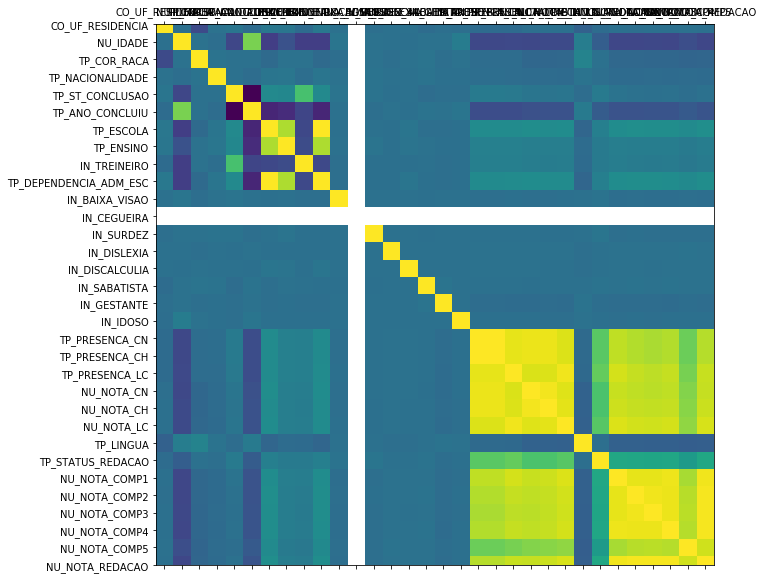

In [420]:
# Grafico de correlação entre as variáveis
def plot_corr(X, size=10):
    corr = X.corr()  
    fig, zx = plt.subplots(figsize = (size, size))
    zx.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)  
plot_corr(X)

### Avaliação dos modelos de regressão

In [421]:
# Seleção das features e target
X = X[base] #Filtrando as variáveis 
# y já definido na escolha das variáveis

# Realizando normalização dos dados (Resultado não foi bom após a normalização)
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

# Dividindo dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [422]:
# Função criada para aplicação do modelo e medição da performance
def benchmark(clf):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_test)
    y_true = list(y_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = clf.score(X_test, y_test)
    if score < 0 or score > 1:
        print("score: FAIL")
        score = 0
    else:
        print("score:   %0.3f" % score)

    if hasattr(clf, 'coef_'):
        print("coef_: ", clf.coef_)
        print("intercept_: ", clf.intercept_)
        print()

    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time, clf


In [423]:
# Lista que vai armazennar as métricas de cada modelo
results = []

In [424]:
print('=' * 80)
print('LinearSVR')
results.append(benchmark((LinearSVR())))

LinearSVR
________________________________________________________________________________
Training: 
LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)
train time: 1.693s
test time:  0.002s
score:   0.825
coef_:  [-9.90536805e-06  5.11666542e-03 -3.00518071e-04 -2.22411446e-03
 -3.69606842e-02  1.11712699e-01 -1.65421055e-03 -1.65421055e-03
  1.25581981e+01  1.84380851e-01 -1.24057149e-01  7.65582430e-01
 -7.50341154e-05  1.83315211e+01  1.88924261e-01  8.81294634e-02
 -3.80101349e-02 -6.98716430e-03 -7.12206682e-02  1.60835757e-01]
intercept_:  [-0.00455779]




c:\program files (x86)\python\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [425]:
print('=' * 80)
print('DecisionTreeRegressor')
results.append(benchmark((DecisionTreeRegressor())))

DecisionTreeRegressor
________________________________________________________________________________
Training: 
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
train time: 0.109s
test time:  0.003s
score:   0.843



In [426]:
print('=' * 80)
print('KNeighborsRegressor')
results.append(benchmark((KNeighborsRegressor())))

KNeighborsRegressor
________________________________________________________________________________
Training: 
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
train time: 0.115s
test time:  0.212s
score:   0.905



In [427]:
print('=' * 80)
print('Ridge')
results.append(benchmark((Ridge(alpha=1.0))))

Ridge
________________________________________________________________________________
Training: 
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
train time: 0.010s
test time:  0.003s
score:   0.912
coef_:  [-3.18779691e+00  2.84931513e+01  3.52695351e+00 -1.23242933e+01
 -2.99577613e+01  5.33266630e+01 -8.58426924e+01 -8.58426924e+01
  1.77004785e+02  4.09256253e-01  2.89857951e-02  3.97410040e-01
 -6.47583570e+00  1.15809412e+01  5.29307653e-02 -8.14816649e-03
  6.59744163e-03  1.98567071e-02  3.40230182e-03  7.46292980e-02]
intercept_:  -18.92097245361606




In [428]:
print('=' * 80)
print('RidgeCV')
results.append(benchmark((RidgeCV())))

RidgeCV
________________________________________________________________________________
Training: 
RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)
train time: 0.035s
test time:  0.003s
score:   0.912
coef_:  [-3.18779692e+00  2.84931513e+01  3.52695351e+00 -1.23242933e+01
 -2.99577613e+01  5.33266630e+01 -8.58426924e+01 -8.58426924e+01
  1.77004785e+02  4.09257532e-01  2.89872836e-02  3.97411997e-01
 -6.47583570e+00  1.15809412e+01  5.29296350e-02 -8.14929458e-03
  6.59629509e-03  1.98555641e-02  3.40107066e-03  7.46332707e-02]
intercept_:  -18.923870520364744




In [429]:
print('=' * 80)
print('LinearRegression')
results.append(benchmark((LinearRegression())))

LinearRegression
________________________________________________________________________________
Training: 
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
train time: 0.013s
test time:  0.004s
score:   0.912
coef_:  [-3.21034145e+00  2.95524951e+01  3.45671700e+00 -1.28715213e+01
 -5.95760489e+01  1.06633640e+02 -2.06041106e+08  2.06040931e+08
  1.79973803e+02  4.10690603e-01  3.09907821e-02  3.95104668e-01
 -6.49843220e+00  1.14677386e+01  2.71195015e+10  2.71195015e+10
  2.71195015e+10  2.71195015e+10  2.71195015e+10 -2.71195015e+10]
intercept_:  -19.743736343772753




In [430]:
print('=' * 80)
print('Lasso')
results.append(benchmark((Lasso())))

Lasso
________________________________________________________________________________
Training: 
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
train time: 0.350s
test time:  0.001s
score:   0.903
coef_:  [-2.10237405  0.          0.          0.88579081 -0.          0.
 -0.         -0.          0.          0.33400712 -0.13011482  0.60281526
 -2.83820328 13.76870932  0.2437786   0.16002233  0.12885681  0.13693482
  0.12246062 -0.03434497]
intercept_:  3.236280632448313




In [431]:
print('=' * 80)
print('ElasticNet')
results.append(benchmark((ElasticNet())))

ElasticNet
________________________________________________________________________________
Training: 
ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
train time: 0.305s
test time:  0.002s
score:   0.903
coef_:  [-1.65793292  0.11203928  0.          0.937559   -0.          0.
 -0.69828281 -0.69828031  0.71923437  0.34173963 -0.127817    0.64161038
 -1.48454424  5.3976831   0.17348113  0.14283625  0.12662205  0.13033221
  0.13276847 -0.04388078]
intercept_:  1.64499935542284




In [432]:
print('=' * 80)
print('Lars')
results.append(benchmark((Lars())))

Lars
________________________________________________________________________________
Training: 
Lars(copy_X=True, eps=2.220446049250313e-16, fit_intercept=True, fit_path=True,
     n_nonzero_coefs=500, normalize=True, precompute='auto', verbose=False)
train time: 0.030s
test time:  0.002s
score:   0.907
coef_:  [-3.12160671e+00  2.86881619e+01  1.92581553e+00 -1.23626483e+01
 -2.47401257e+01  9.54065996e+01  0.00000000e+00 -2.04529232e+02
  1.47516567e+02  4.57232190e-01  4.22864288e-02  3.09476489e-01
 -6.18888397e+00  2.43664638e+01 -8.17349933e+11 -8.17349933e+11
 -8.17349933e+11 -8.17349933e+11 -8.17349933e+11  8.17349933e+11]
intercept_:  -19.118736343772753




c:\program files (x86)\python\lib\site-packages\sklearn\linear_model\_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 20 iterations, i.e. alpha=1.211e-03, with an active set of 19 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)


In [433]:
print('=' * 80)
print('LassoLars')
results.append(benchmark((LassoLars())))

LassoLars
________________________________________________________________________________
Training: 
LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, max_iter=500, normalize=True, positive=False,
          precompute='auto', verbose=False)
train time: 0.008s
test time:  0.003s
score:   0.676
coef_:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00459988 0.         0.46857907
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
intercept_:  175.4103921661604




In [434]:
print('=' * 80)
print('HuberRegressor')
results.append(benchmark((HuberRegressor(max_iter=10000))))

HuberRegressor
________________________________________________________________________________
Training: 
HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=10000,
               tol=1e-05, warm_start=False)
train time: 18.559s
test time:  0.002s
score:   0.912
coef_:  [-2.30068092e+00  7.92599417e+00  2.29201106e+00 -2.99614534e+00
 -3.16823639e+00  3.16823724e+00 -1.33814854e+02 -1.33814854e+02
  2.64425651e+02  4.66320697e-01  1.28176601e-01  2.87522557e-01
 -4.10717061e+00  7.78792840e+00 -3.69278309e-02  1.57501989e-02
 -1.39117197e-02  4.58304822e-02  4.26124701e-02  5.33536007e-02]
intercept_:  -1.1323840896910953




In [435]:
print('=' * 80)
print('BayesianRidge')
results.append(benchmark((BayesianRidge())))

BayesianRidge
________________________________________________________________________________
Training: 
BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
train time: 0.030s
test time:  0.002s
score:   0.912
coef_:  [-3.17996047e+00  2.78169292e+01  3.52333651e+00 -1.19832811e+01
 -2.29939051e+01  4.09146563e+01 -8.51626130e+01 -8.51626130e+01
  1.75146832e+02  4.08756580e-01  2.77104209e-02  3.99395571e-01
 -6.46484459e+00  1.16629633e+01  5.45231178e-02 -7.45726377e-03
  5.83121926e-03  1.94812417e-02  2.64872611e-03  7.50229657e-02]
intercept_:  -18.276240220371676




In [436]:
print('=' * 80)
print('PassiveAggressiveRegressor')
results.append(benchmark((PassiveAggressiveRegressor())))

PassiveAggressiveRegressor
________________________________________________________________________________
Training: 
PassiveAggressiveRegressor(C=1.0, average=False, early_stopping=False,
                           epsilon=0.1, fit_intercept=True,
                           loss='epsilon_insensitive', max_iter=1000,
                           n_iter_no_change=5, random_state=None, shuffle=True,
                           tol=0.001, validation_fraction=0.1, verbose=0,
                           warm_start=False)
train time: 0.026s
test time:  0.003s
score:   0.730
coef_:  [-2.22117624e-02  2.04641703e-02  2.27952034e-02  1.59714793e-02
 -3.19595436e-04  6.95209132e-04 -1.86383073e-02 -1.86383073e-02
  1.13123177e-01  2.08605615e-01 -6.39122309e-02  6.56009496e-01
 -3.85066404e-02  4.72895783e-01  1.78114725e-01  6.77367873e-02
  3.54956626e-02  3.82042691e-02 -3.56901324e-02  2.83861311e-01]
intercept_:  [0.0100563]




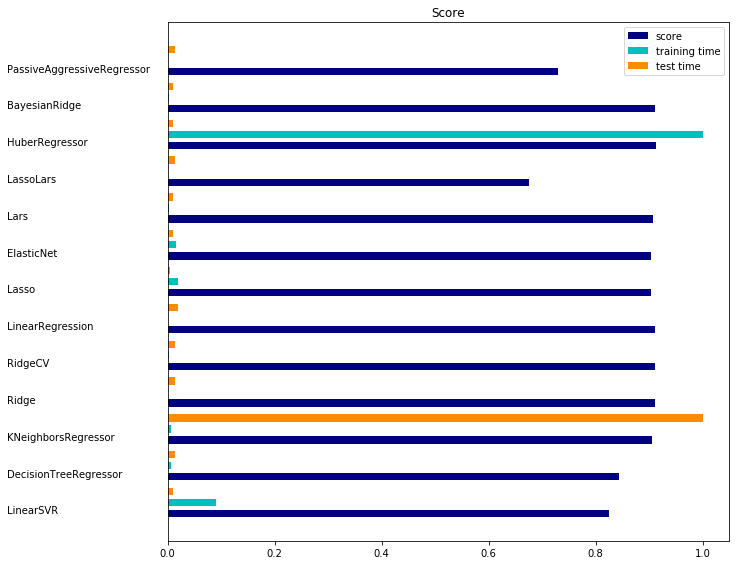

In [437]:
# Gráfico de avalização dos modelos
indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time", color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()

### Escolhendo modelo de regressão

In [438]:
model = benchmark(BayesianRidge())[4]

________________________________________________________________________________
Training: 
BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
train time: 0.027s
test time:  0.001s
score:   0.912
coef_:  [-3.17996047e+00  2.78169292e+01  3.52333651e+00 -1.19832811e+01
 -2.29939051e+01  4.09146563e+01 -8.51626130e+01 -8.51626130e+01
  1.75146832e+02  4.08756580e-01  2.77104209e-02  3.99395571e-01
 -6.46484459e+00  1.16629633e+01  5.45231178e-02 -7.45726377e-03
  5.83121926e-03  1.94812417e-02  2.64872611e-03  7.50229657e-02]
intercept_:  -18.276240220371676




### Aplicando modelo nos dados de teste

In [439]:
# Preparando base de teste
df2 = test[base]

# Eliminando valores nulos na base de teste
df2.fillna(0, inplace=True)

# Normalizando os dados de teste
# df2 = scaler.fit_transform(df2)

# df2 = pd.DataFrame(data=df2, columns=base)

c:\program files (x86)\python\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [440]:
# Realizando a predição
df2['NU_NOTA_MT'] = model.predict(df2)

# Inserindo os numeros de inscrição
df2['NU_INSCRICAO'] = test['NU_INSCRICAO']

# Preparando df para exportação
df2 = df2[['NU_INSCRICAO', 'NU_NOTA_MT']]

c:\program files (x86)\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\program files (x86)\python\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [441]:
# Exportação da predição para csv
df2.to_csv('answer.csv', index=False)

In [442]:
df2

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,431.200424
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,454.826181
2,b38a03232f43b11c9d0788abaf060f7366053b6d,562.672666
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0.000808
4,715494628a50142ce8cb17191cfe6d0f3cae0934,535.218831
...,...,...
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,455.215346
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,442.958429
4573,655fa6306720ff16e825903b5422a46608a77545,602.890252
4574,1f4bc3e3d56212d500625bfe8ac78ccff4362293,469.477325
